#Gráfico dispersión y medidas asociación

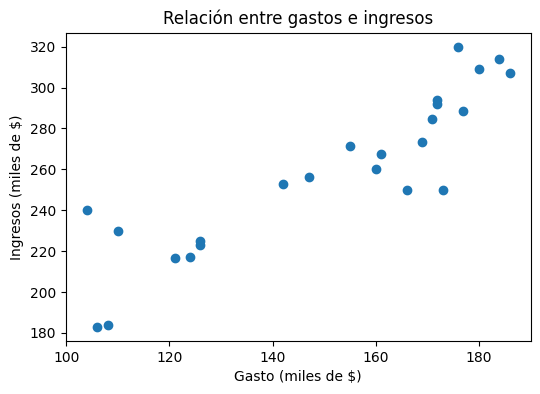

La covarianza es 964.993.
Existe un relación creciente entre las variables.
La correlación es 0.896.


In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

df_ASOC = pd.read_excel('BBDD (Gastos-Ingresos-24).xlsx')

# Declaramos las variables...el ingreso obtenido por una empresa va a depender del gasto en publicidad
Valores_indep = df_ASOC['Gasto (miles de $)'] #va en eje x
Valores_dep = df_ASOC['Ingresos (miles de $)'] #va en eje y

# Gráfico dispersión
fig, ax = plt.subplots(figsize=(6, 4))
Graf_dispersion = ax.scatter(Valores_indep, Valores_dep)
ax.set_title('Relación entre gastos e ingresos')
ax.set_xlabel('Gasto (miles de $)')
ax.set_ylabel('Ingresos (miles de $)')
plt.show()

# Covarianza
cov = Valores_indep.cov(Valores_dep)
print(f'La covarianza es {cov:.3f}.')
if cov > 0:
  print('Existe un relación creciente entre las variables.')
elif cov < 0:
  print('Existe un relación decreciente entre las variables.')

# Correlación
corr = Valores_indep.corr(Valores_dep)
print(f'La correlación es {corr:.3f}.')

#Si corr es cercano a 1
#print(f'Existe fuerte correlación lineal de pendiente positiva entre las variables.')
#Si corr es cercano a -1
#print(f'Existe fuerte correlación lineal de pendiente negativa entre las variables.')
#Si corr es cercano a 0
#print(f'No existe correlación lineal entre las variables.')


#Modelo de Regresión

In [2]:
# Importar librerías
import pandas as pd
import numpy as np

df_ASOC = pd.read_excel('BBDD (Gastos-Ingresos-24).xlsx')

Valores_indep = df_ASOC['Gasto (miles de $)']
Valores_dep = df_ASOC['Ingresos (miles de $)']

modelo_lineal = np.polyfit(Valores_indep, Valores_dep, 1)
pendiente, intercepto = modelo_lineal

print(f'La pendiente es {pendiente:.3f}')
print(f'El intercepto es {intercepto:.3f}')
print(f'La ecuación del modelo lineal es y = {pendiente:.3f}x + {intercepto:.3f}')

def I(g):
  return pendiente*g + intercepto
print(f'Para un gasto en publicidad de $135000, se estima un ingreso de ${I(135)*1000:.0f}')



La pendiente es 1.254
El intercepto es 69.858
La ecuación del modelo lineal es y = 1.254x + 69.858
Para un gasto en publicidad de $135000, se estima un ingreso de $239090


#Coeficiente de determinación

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

df_ASOC = pd.read_excel('BBDD (Gastos-Ingresos-24).xlsx')

Valores_indep = df_ASOC['Gasto (miles de $)']
Valores_dep = df_ASOC['Ingresos (miles de $)']

# Obtención (de los parámetros) del modelo lineal
modelo_lineal = np.polyfit(Valores_indep, Valores_dep, 1)

# Coeficiente de determinación
predicciones = np.polyval(modelo_lineal, Valores_indep)
R2= r2_score(Valores_dep, predicciones)
print(f'El coeficiente de determinación es {R2*100:.1f}%')
print(f'Esto significa que el modelo permite explicar el {R2*100:.1f}% de las variaciones en el ingreso a partir del gasto')


El coeficiente de determinación es 80.3%
Esto significa que el modelo permite explicar el 80.3% de las variaciones en el ingreso a partir del gasto
